# I. Data Preparation
In this initial section, we load the raw dataset, process the timestamps, and perform essential unit conversions. The data is
 then aggregated into annual means to prepare for long-term trend and relationship analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Load data and convert time string to datetime format
df = pd.read_csv("project_1.csv")
df["time"] = pd.to_datetime(df["time"])
df["year"] = df["time"].dt.year

# Convert units for precipitation, temperature, and specific humidity
df["PRECT_mm"] = df["PRECT"] * 86400 * 1000 * 365 # Total annual precipitation (年总降水毫米数)
df["TREFHT_C"] = df["TREFHT"] - 273.15            # Kelvin to Celsius (°C)
df["QBOT_g_kg"] = df["QBOT"] * 1000               # kg/kg to g/kg

# Aggregate variables into annual means
annual_mean = df.groupby("year")[["TREFHT_C", "PRECT_mm", "FSNS", "FLNS", "QBOT_g_kg", "UBOT", "VBOT"]].mean().reset_index()
years = annual_mean["year"]

# II. Trend Analysis
## 1. Temperature Trend
We plot the annual mean temperature over time with a linear regression line. The positive slope clearly demonstrates a long-term global warming effect in the region.

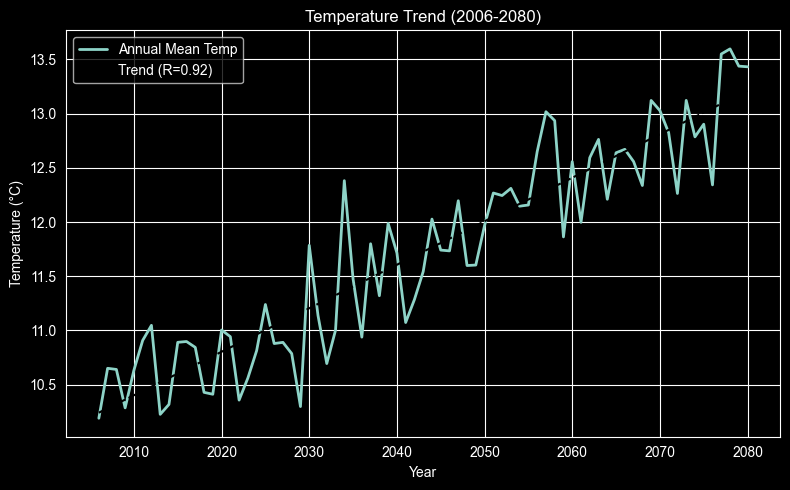

In [2]:
plt.figure(figsize=(8, 5))

# Extract x and y variables
y_temp = annual_mean["TREFHT_C"]

# Perform linear regression and calculate the trend line
slope, intercept, r_val, p_val, std_err = linregress(years, y_temp)
trend_line = intercept + slope * years

# Plot the original data and the trend line
plt.plot(years, y_temp, linewidth=2, label="Annual Mean Temp")
plt.plot(years, trend_line, 'k--', label=f"Trend (R={r_val:.2f})")

# Set labels and title
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Trend (2006-2080)")
plt.legend()
plt.tight_layout()
plt.show()

## 2. Precipitation Trend
This plot visualizes the annual precipitation trend. Unlike temperature, precipitation usually shows high interannual variability and a less obvious monotonic trend.

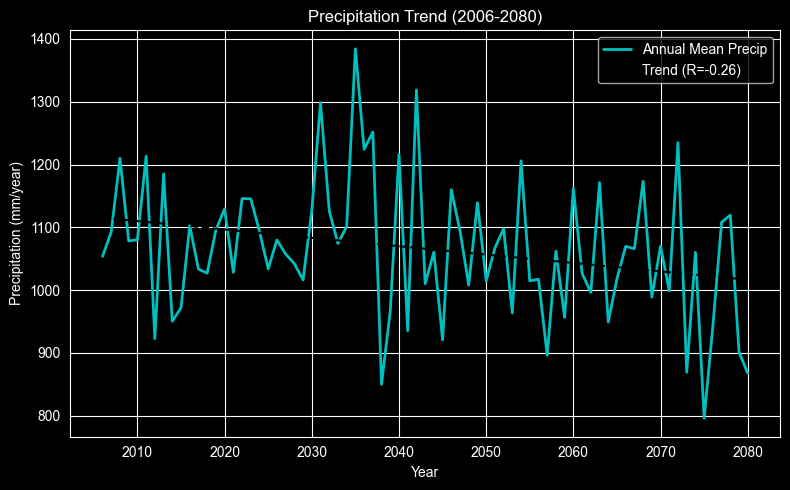

In [3]:
plt.figure(figsize=(8, 5))

# Extract y variable
y_precip = annual_mean["PRECT_mm"]

# Perform linear regression
slope, intercept, r_val, p_val, std_err = linregress(years, y_precip)
trend_line = intercept + slope * years

# Plot data and trend
plt.plot(years, y_precip, linewidth=2, color='c', label="Annual Mean Precip")
plt.plot(years, trend_line, 'k--', label=f"Trend (R={r_val:.2f})")

plt.xlabel("Year")
plt.ylabel("Precipitation (mm/year)")
plt.title("Precipitation Trend (2006-2080)")
plt.legend()
plt.tight_layout()
plt.show()

## 3. Radiation Trend
Here we plot the surface net solar radiation (FSNS). Variations in radiation reflect changes in cloud cover and atmospheric aerosols over time.

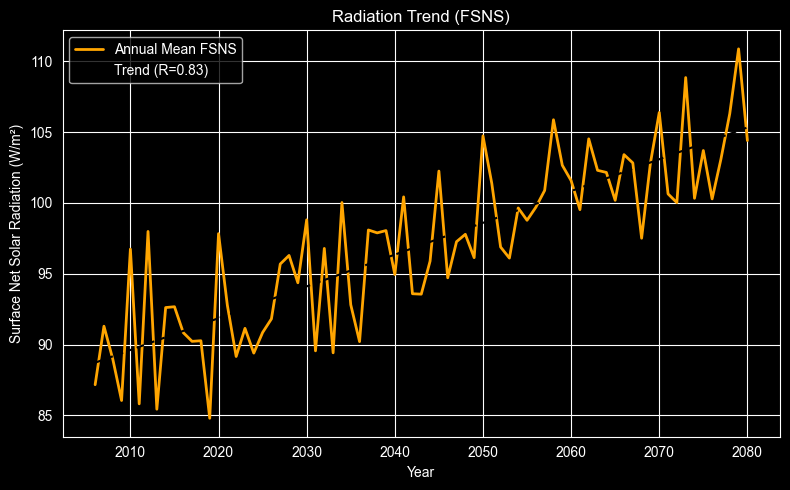

In [4]:
plt.figure(figsize=(8, 5))

# Extract y variable
y_rad = annual_mean["FSNS"]

# Perform linear regression
slope, intercept, r_val, p_val, std_err = linregress(years, y_rad)
trend_line = intercept + slope * years

# Plot data and trend
plt.plot(years, y_rad, linewidth=2, color='orange', label="Annual Mean FSNS")
plt.plot(years, trend_line, 'k--', label=f"Trend (R={r_val:.2f})")

plt.xlabel("Year")
plt.ylabel("Surface Net Solar Radiation (W/m²)")
plt.title("Radiation Trend (FSNS)")
plt.legend()
plt.tight_layout()
plt.show()

# III. Correlation Analysis
## 1. Correlation Matrix
A correlation matrix heatmap is generated to reveal the multivariable linear relationships among temperature, radiation, humidity, wind, and precipitation.

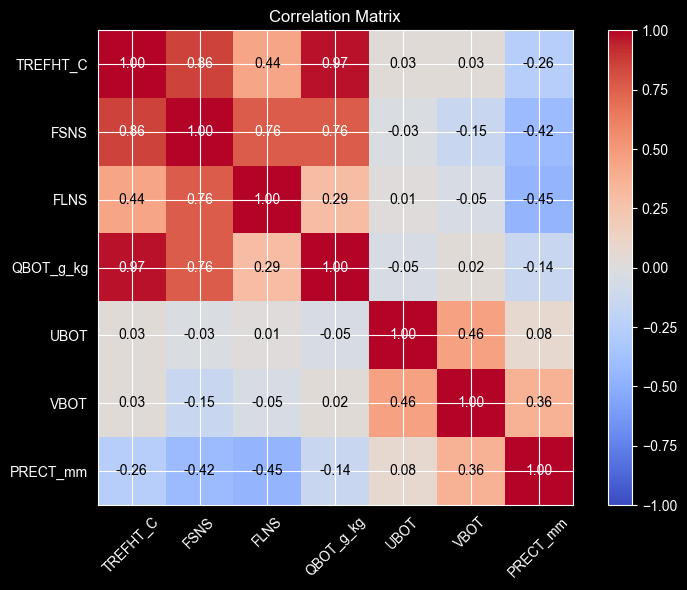

In [5]:
# Select variables for correlation and calculate the matrix
corr_vars = ["TREFHT_C", "FSNS", "FLNS", "QBOT_g_kg", "UBOT", "VBOT", "PRECT_mm"]
corr_matrix = annual_mean[corr_vars].corr()

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the heatmap using imshow
cax = ax.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)

# Annotate each cell with the correlation coefficient
for i in range(len(corr_vars)):
    for j in range(len(corr_vars)):
        text_color = "black" if abs(corr_matrix.iloc[i, j]) < 0.5 else "white"
        ax.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}",
                ha="center", va="center", color=text_color)

# Configure axes ticks and labels
ax.set_xticks(np.arange(len(corr_vars)))
ax.set_yticks(np.arange(len(corr_vars)))
ax.set_xticklabels(corr_vars, rotation=45)
ax.set_yticklabels(corr_vars)
ax.set_title("Correlation Matrix")

plt.tight_layout()
plt.show()

# IV. Relationship Analysis
## 1. TEMPERATURE–RADIATION RELATIONSHIP
This scatter plot correlates net solar radiation with temperature. The positive linear fit suggests that increased solar radiation (often due to clearer skies) directly contributes to higher surface temperatures.

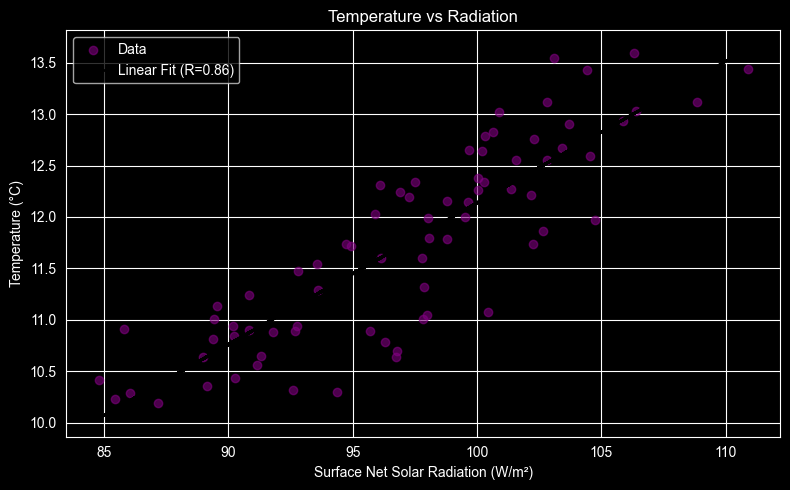

In [6]:
plt.figure(figsize=(8, 5))

x_rad = annual_mean["FSNS"]
y_temp = annual_mean["TREFHT_C"]

# Linear regression
slope, intercept, r_val, p_val, std_err = linregress(x_rad, y_temp)

# Scatter plot and regression line
plt.scatter(x_rad, y_temp, alpha=0.6, color='purple', label="Data")
plt.plot(x_rad, intercept + slope * x_rad, 'k-', linewidth=2, label=f"Linear Fit (R={r_val:.2f})")

plt.xlabel("Surface Net Solar Radiation (W/m²)")
plt.ylabel("Temperature (°C)")
plt.title("Temperature vs Radiation")
plt.legend()
plt.tight_layout()
plt.show()

## 2. TEMPERATURE–QBOT Relationship
Markdown Explanation and Analysis :

This study explores the correlation between specific humidity (QBOT) and temperature. The strong correlation reflects the Clausius-Clapeyron relation, where
 warmer air can hold exponentially more water vapor.

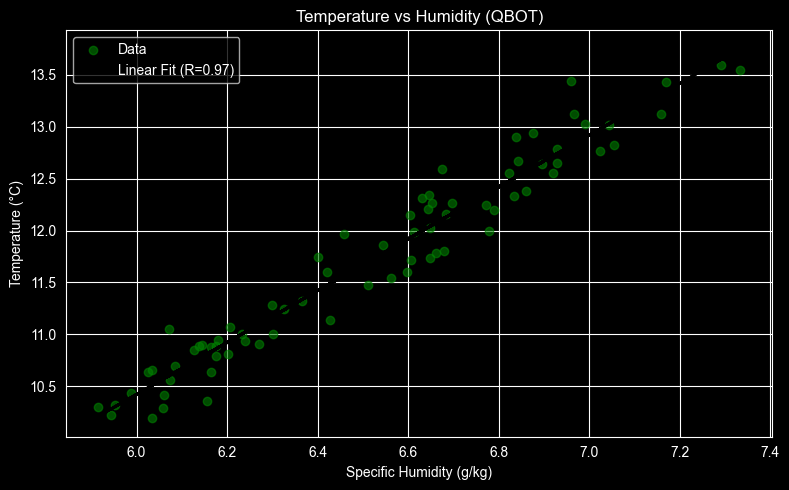

In [7]:
plt.figure(figsize=(8, 5))

x_qbot = annual_mean["QBOT_g_kg"]
y_temp = annual_mean["TREFHT_C"]

# Linear regression
slope, intercept, r_val, p_val, std_err = linregress(x_qbot, y_temp)

# Scatter plot and regression line
plt.scatter(x_qbot, y_temp, alpha=0.6, color='green', label="Data")
plt.plot(x_qbot, intercept + slope * x_qbot, 'k-', linewidth=2, label=f"Linear Fit (R={r_val:.2f})")

plt.xlabel("Specific Humidity (g/kg)")
plt.ylabel("Temperature (°C)")
plt.title("Temperature vs Humidity (QBOT)")
plt.legend()
plt.tight_layout()
plt.show()